# Continuous Control Project

## 1. Models tested

We tried and trained a DDPG algo with different sets of parameters:
- learning batch sizes for values [50, 100, 150, 200, 250]
- number of steps between learning steps for values [1, 4, 8, 12, 16, 20]
- Ornstein-Uhlenbeck process (theta, sigma) for values [(0.15, 0.2), (0, 0)]
- Actor & Critic learning rates for values [(1e-4, 1e-3), (1e-3, 1e-3)]

### Notation

A DDPG model will be identified by the following string: 
"[batch_size]_[nb_learning_steps]_[actor_lr]_[critic_lr]_[noise_theta]_[noise_sigma]_[actor_hidden_layers]_[critic_hidden_layer]"

For instance "150_8_0.001_0.001_0.15_0.1_(128, 128)_(128, 128)" designates a DDPG algo trained with:
- an actor neural network composed of 2 hidden layers fully connected of 128 nodes each
- a critic neural network composed of 2 hidden layers fully connected of 128 nodes each
- using a learning batch size of 150 steps at a time
- every 8 steps
- with an actor learning rate of 1e-3
- and a critic learning rate of 1e-3
- with noise parameters of (theta = 0.15, sigma = 0.1)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import results_analysis

## 2. Training results

Below we gather the results of all the training runs tried with different sets of parameters

In [3]:
# Get results from all training runs contained in the Results directory
df_results_step, df_results, df_details = results_analysis.get_training_results()

# Get best training runs
# best_results_step finds the highest step-values among all training runs
# best_results finds the highest end-of-episode values among all training runs
best_results_step, best_results = results_analysis.get_best_runs(df_results_step, df_results, nb_runs=5)

display(best_results_step.iloc[:5])
display(best_results.iloc[:5])

score
training     model_tag                                                   
training_4_1 200_16_0.001_0.001_0.0_0.0_(128; 128)_(128; 128)   39.669999
training_6   150_8_0.001_0.001_0.15_0.1_(128; 128)_(128; 128)   39.589999
training_4_1 200_12_0.001_0.001_0.0_0.0_(128; 128)_(128; 128)   39.559999
             250_8_0.001_0.001_0.0_0.0_(128; 128)_(128; 128)    39.389999
training_6   200_12_0.001_0.001_0.15_0.1_(128; 128)_(128; 128)  39.359999

score
training     model_tag                                                   
training_6   150_8_0.001_0.001_0.15_0.1_(128; 128)_(128; 128)   30.112399
training_4_1 200_12_0.001_0.001_0.0_0.0_(128; 128)_(128; 128)   30.107199
training_6   200_12_0.001_0.001_0.15_0.1_(128; 128)_(128; 128)  30.072299
             150_12_0.001_0.001_0.15_0.1_(128; 128)_(128; 128)  19.875200
training_4   250_8_0.001_0.001_0.0_0.0_(128; 128)_(128; 128)    19.524100

## 3. Parameter analysis

In order to find the best model, I used the first training runs I had done and tried to keep the variation of each parameter that got the "best" results over all the runs (looking at max and mean values)

After running some more training passes with the most promising combinations of parameter values, I got the below summary table. 

In [4]:
# parameters_summary contains some statistics for each parameter values tried
parameters_summary = results_analysis.get_stats_per_parameter(df_details)
display(parameters_summary)

max  mean  count
tag_type    tag_value                     
batch_size  50           5.29  0.62     30
            100         11.61  1.07     36
            150         11.77  1.84     41
            200         17.87  2.20     46
            250         19.52  3.47     36
learn_step  1            1.01  0.59     29
            4            2.58  0.94     29
            8           19.52  2.76     37
            12          12.56  2.75     36
            16          17.87  2.42     29
            20           7.39  1.50     29
actor_lr    0.001       19.52  2.06    165
            0.0001       2.75  0.78     24
critic_lr   0.001       19.52  1.90    189
noise_theta 0.15         9.73  1.22    136
            0.0         19.52  3.64     53
noise_sigma 0.2          9.73  1.18    132
            0.0         19.52  3.64     53
            0.1          5.79  2.34      4
actor_nn    (400; 300)   4.75  1.13     54
            (256; 256)   9.73  1.61     30
            (128; 128)  19.52  2.31     99
            (64; 64)     7.33  3.56      6
critic_nn   (400; 300)   4.75  1.13     54
            (256; 256)   9.73  1.61     30
            (128; 128)  19.52  2.31     99
            (64; 64)     7.33  3.56      6

## 4. Best model

I selected as "best model" the one that reached an average score of 30 the fastest; in 782 steps

In [8]:
selected_model = best_results.index[0][1]

display(df_results[df_results['model_tag']==selected_model])

,model_id,model_tag,episode,score,training
40,2,150_8_0.001_0.001_0.15_0.1_(128; 128)_(128; 128),100,1.438200,training_6
41,2,150_8_0.001_0.001_0.15_0.1_(128; 128)_(128; 128),200,3.535600,training_6
42,2,150_8_0.001_0.001_0.15_0.1_(128; 128)_(128; 128),300,10.003400,training_6
43,2,150_8_0.001_0.001_0.15_0.1_(128; 128)_(128; 128),400,15.353400,training_6
44,2,150_8_0.001_0.001_0.15_0.1_(128; 128)_(128; 128),500,20.222300,training_6
45,2,150_8_0.001_0.001_0.15_0.1_(128; 128)_(128; 128),600,22.933699,training_6
46,2,150_8_0.001_0.001_0.15_0.1_(128; 128)_(128; 128),700,26.343899,training_6
47,2,150_8_0.001_0.001_0.15_0.1_(128; 128)_(128; 128),782,30.112399,training_6


### 4.1 Training plots

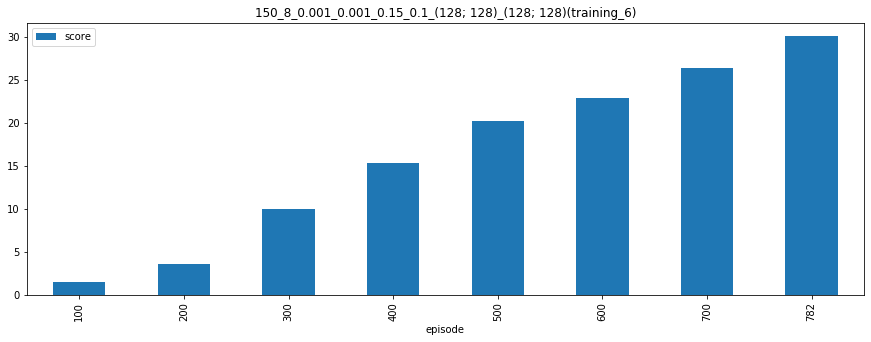

In [11]:
# Plot 100-steps average scores
training_run, selected_model = best_results.index[0]
results_analysis.plot_model(df_results_step, df_results, training_run, selected_model, by_step=False, kind='bar')

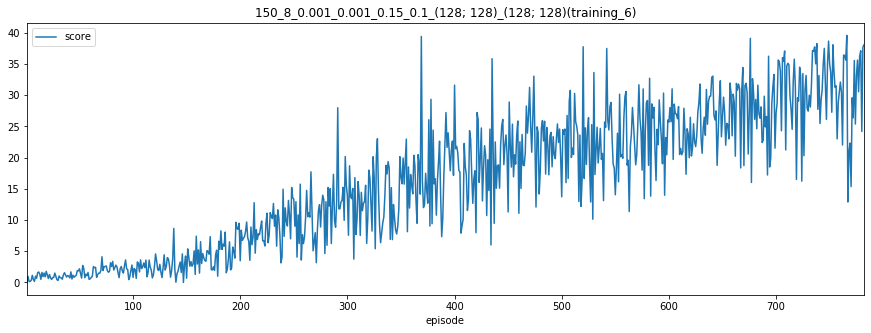

In [12]:
# Plot all steps
results_analysis.plot_model(df_results_step, df_results, training_run, model_tag, by_step=True, kind='line')

### 4.2 Test

Below a test run using the selected "best model"

In [13]:
import os 
import results_analysis

#You need to be at the root directory of the navigation directory to run the model in the next cell
os.chdir('..')
print(os.getcwd())

selected_model = best_results.index[0][1] \
    if len(best_results_step) > 0 \
    else '150_8_0.001_0.001_0.15_0.1_(128, 128)_(128, 128)'

print('selected_model', selected_model)

/home/julien/Programming/VSC/UdacityRL/ContinuousControl
selected_model 150_8_0.001_0.001_0.15_0.1_(128; 128)_(128; 128)


In [14]:
#The selected model was trained in 782 episodes (reached a score of 30 over the last 100 episodes)
display(df_results[df_results['model_tag'] == selected_model])

,model_id,model_tag,episode,score,training
40,2,150_8_0.001_0.001_0.15_0.1_(128; 128)_(128; 128),100,1.438200,training_6
41,2,150_8_0.001_0.001_0.15_0.1_(128; 128)_(128; 128),200,3.535600,training_6
42,2,150_8_0.001_0.001_0.15_0.1_(128; 128)_(128; 128),300,10.003400,training_6
43,2,150_8_0.001_0.001_0.15_0.1_(128; 128)_(128; 128),400,15.353400,training_6
44,2,150_8_0.001_0.001_0.15_0.1_(128; 128)_(128; 128),500,20.222300,training_6
45,2,150_8_0.001_0.001_0.15_0.1_(128; 128)_(128; 128),600,22.933699,training_6
46,2,150_8_0.001_0.001_0.15_0.1_(128; 128)_(128; 128),700,26.343899,training_6
47,2,150_8_0.001_0.001_0.15_0.1_(128; 128)_(128; 128),782,30.112399,training_6


In [15]:
#If you get the "handle is closed" error, you need to restart your kernel and execute from the Conclusion first cell; 
#I don't know how to fix that
%run -i continuous_control.py test --test_params=best_params.json --test_model="auto" --test_results_path=""

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Load model weights ./ModelWeights/150_8_0.001_0.001_0.15_0.1_(128, 128)_(128, 128).pth
Score: 37.57